### Exploring Quarterback Statistics and Application to fantasy football

In [2]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#looking at the last season and current
seasons = range(2022,2023)
pbp = nfl.import_pbp_data(seasons)

2022 done.
Downcasting floats.


In [4]:
pbp.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

In [5]:
pbp.shape

(50147, 384)

In [6]:
cols = ['play_type','pass_length','passing_yards','air_yards','td_prob','epa','interception','pass_attempt','touchdown','pass_touchdown','complete_pass','passer_player_id','passer_player_name','qb_epa']

In [7]:
pbp_qb = pbp.query("play_type == 'pass' & air_yards.notnull()").reset_index()

In [8]:
pbp_qb = pbp_qb[cols]

In [9]:
pbp_qb['pass_length_air_yards'] = np.where(pbp_qb['air_yards']>= 20,"long","short")

In [10]:
pbp_qb

,play_type,pass_length,passing_yards,air_yards,td_prob,epa,interception,pass_attempt,touchdown,pass_touchdown,complete_pass,passer_player_id,passer_player_name,qb_epa,pass_length_air_yards
0,pass,short,NaN,0.0,0.465806,-0.492192,0.0,1.0,0.0,0.0,0.0,00-0026158,J.Flacco,-0.492192,short
1,pass,short,NaN,0.0,0.418190,-2.402200,0.0,1.0,0.0,0.0,0.0,00-0026158,J.Flacco,-2.402200,short
2,pass,short,4.0,-4.0,0.363601,0.075127,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,0.075127,short
3,pass,short,4.0,3.0,0.365037,-0.105120,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,-0.105120,short
4,pass,short,8.0,2.0,0.376760,0.411132,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,0.411132,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,pass,deep,45.0,41.0,0.426854,3.239489,0.0,1.0,0.0,0.0,1.0,00-0036389,J.Hurts,3.239489,long
18936,pass,short,10.0,6.0,0.231651,1.280741,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,1.280741,short
18937,pass,short,7.0,4.0,0.260468,0.710100,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,0.710100,short
18938,pass,short,0.0,-5.0,0.477706,-0.903265,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,-0.903265,short


In [11]:
agg_features = {'air_yards':'sum','pass_attempt':'sum','complete_pass':'sum','touchdown':'sum','interception':'sum'}
pbp_qb_basics = pbp_qb.groupby(['passer_player_name','passer_player_id']).agg(agg_features).reset_index() 

In [12]:
pbp_qb_basics = pbp_qb_basics.query('pass_attempt >= 100').sort_values(by=['air_yards'], ascending = False)
pbp_qb_basics['completion_rate'] = pbp_qb_basics['complete_pass']/pbp_qb_basics['pass_attempt']
pbp_qb_basics.shape

(47, 8)

In [13]:
pbp_qb_basics.rename(columns = {'air_yards':'air_yards',}, inplace = True)

In [14]:
new_column_order = ['passer_player_name','air_yards','completion_rate','touchdown','interception']

# Create a new DataFrame with the rearranged columns
plot_df = pbp_qb_basics[new_column_order]

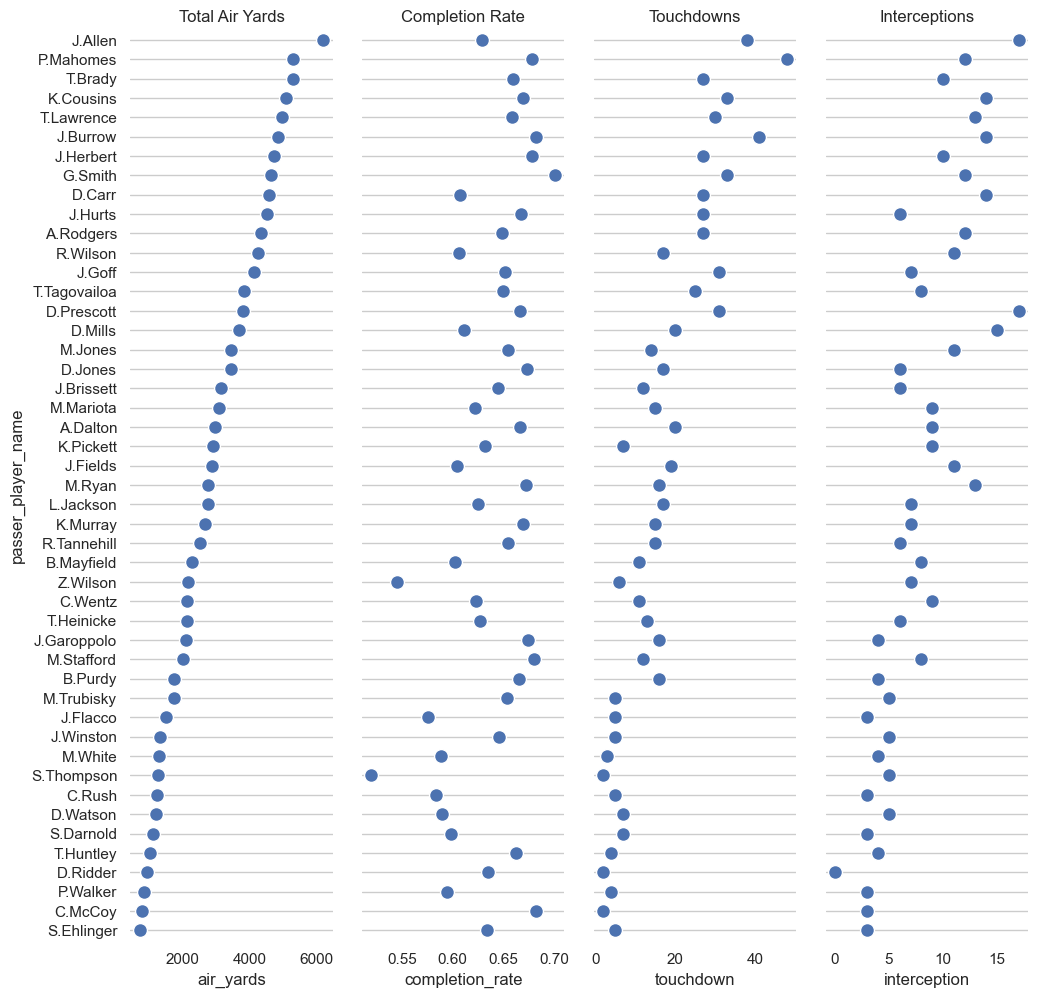

In [15]:
#pbp_qb_basics_plot = pbp_qb_basics[pbp_qb_basics['passer_player_name','air_yards','completion_rate','touchdown','interception']]
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(plot_df,
                 x_vars=plot_df.columns[1:5], y_vars=["passer_player_name"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total Air Yards", "Completion Rate", "Touchdowns",
          "Interceptions"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

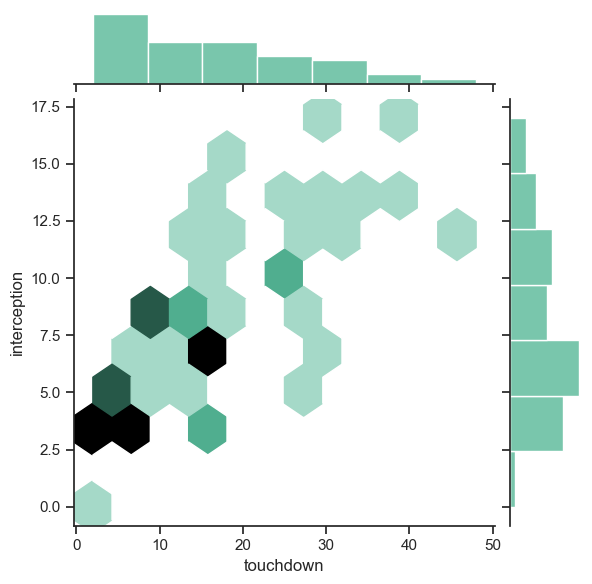

In [16]:
#joint plot for the relation between touchdowns and interceptions
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")


x = pbp_qb_basics['touchdown']
y = pbp_qb_basics['interception']
joint_kws=dict(gridsize=10)
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391",joint_kws= joint_kws)

In [17]:
#stable and unstable 
#ypa and epa
pbp_qb

,play_type,pass_length,passing_yards,air_yards,td_prob,epa,interception,pass_attempt,touchdown,pass_touchdown,complete_pass,passer_player_id,passer_player_name,qb_epa,pass_length_air_yards
0,pass,short,NaN,0.0,0.465806,-0.492192,0.0,1.0,0.0,0.0,0.0,00-0026158,J.Flacco,-0.492192,short
1,pass,short,NaN,0.0,0.418190,-2.402200,0.0,1.0,0.0,0.0,0.0,00-0026158,J.Flacco,-2.402200,short
2,pass,short,4.0,-4.0,0.363601,0.075127,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,0.075127,short
3,pass,short,4.0,3.0,0.365037,-0.105120,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,-0.105120,short
4,pass,short,8.0,2.0,0.376760,0.411132,0.0,1.0,0.0,0.0,1.0,00-0034796,L.Jackson,0.411132,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,pass,deep,45.0,41.0,0.426854,3.239489,0.0,1.0,0.0,0.0,1.0,00-0036389,J.Hurts,3.239489,long
18936,pass,short,10.0,6.0,0.231651,1.280741,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,1.280741,short
18937,pass,short,7.0,4.0,0.260468,0.710100,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,0.710100,short
18938,pass,short,0.0,-5.0,0.477706,-0.903265,0.0,1.0,0.0,0.0,1.0,00-0033873,P.Mahomes,-0.903265,short


In [53]:
#short passes
pbp_qb_short = pbp_qb[pbp_qb['pass_length_air_yards'] == 'short']
agg_features = {'passing_yards':'sum','epa':'mean','pass_attempt':'sum'}
pbp_ypa_epa = pbp_qb_short.groupby('passer_player_name').agg(agg_features).reset_index()
pbp_ypa_epa = pbp_ypa_epa.query('pass_attempt >= 100').sort_values(by=['passing_yards'],ascending=False)
pbp_ypa_epa['ypa'] = pbp_ypa_epa['passing_yards']/pbp_ypa_epa['pass_attempt']
s = pbp_ypa_epa.sort_values(by=['ypa'],ascending=False)
s.head(5)

,passer_player_name,passing_yards,epa,pass_attempt,ypa
47,J.Garoppolo,2189.0,0.355429,277.0,7.902527
12,B.Purdy,1575.0,0.324060,204.0,7.720588
98,T.Tagovailoa,2584.0,0.225993,342.0,7.555556
66,M.Mariota,1822.0,0.186222,243.0,7.497942
77,P.Mahomes,5055.0,0.309379,685.0,7.379562


In [35]:
#long
pbp_qb_long = pbp_qb[pbp_qb['pass_length_air_yards'] == 'long']
agg_features = {'passing_yards':'sum','epa':'mean','pass_attempt':'sum'}
pbp_ypa_epa = pbp_qb_long.groupby('passer_player_name').agg(agg_features).reset_index()
pbp_ypa_epa = pbp_ypa_epa.query('pass_attempt >= 50').sort_values(by=['passing_yards'],ascending=False)
pbp_ypa_epa['ypa'] = pbp_ypa_epa['passing_yards']/pbp_ypa_epa['pass_attempt']
l = pbp_ypa_epa.sort_values(by=['ypa'],ascending=False)
l.head(5)

,passer_player_name,passing_yards,epa,pass_attempt,ypa
81,T.Tagovailoa,964.0,0.955092,57.0,16.912281
28,G.Smith,877.0,0.717077,60.0,14.616667
47,K.Cousins,953.0,0.514752,66.0,14.439394
62,P.Mahomes,898.0,0.638876,63.0,14.253968
39,J.Hurts,982.0,0.593733,69.0,14.231884


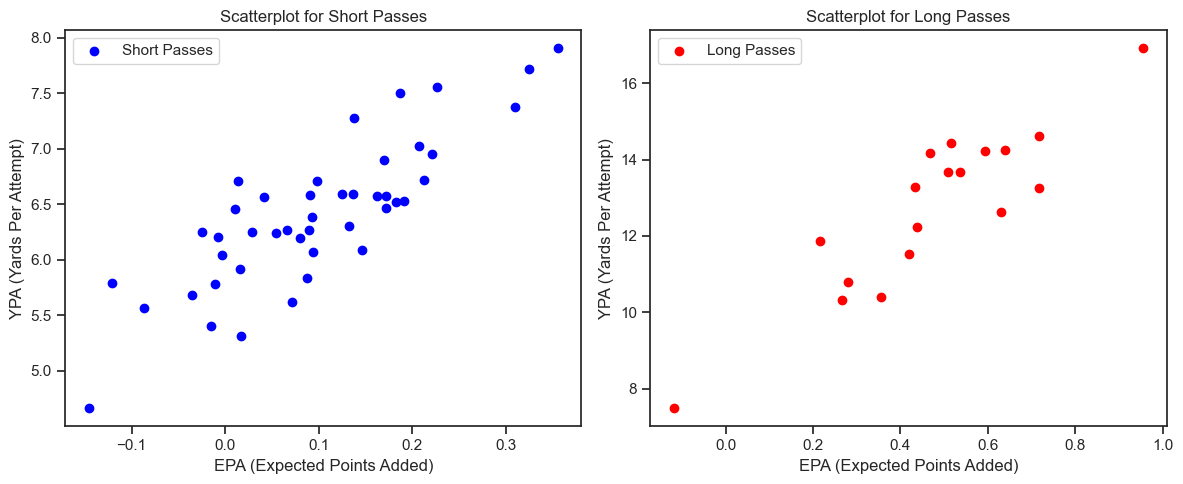

In [38]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot for short passes
axes[0].scatter(s['epa'], s['ypa'], c='blue', label='Short Passes')
axes[0].set_xlabel('EPA (Expected Points Added)')
axes[0].set_ylabel('YPA (Yards Per Attempt)')
axes[0].set_title('Scatterplot for Short Passes')
axes[0].legend()

# Scatterplot for long passes
axes[1].scatter(l['epa'], l['ypa'], c='red', label='Long Passes')
axes[1].set_xlabel('EPA (Expected Points Added)')
axes[1].set_ylabel('YPA (Yards Per Attempt)')
axes[1].set_title('Scatterplot for Long Passes')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [48]:
agg_features = {'passing_yards':'sum','epa':'mean','pass_attempt':'sum'}
pbp_ypa_epa = pbp_qb.groupby('passer_player_name').agg(agg_features).reset_index()
pbp_ypa_epa = pbp_ypa_epa.query('pass_attempt >= 100').sort_values(by=['passing_yards'],ascending=False)
pbp_ypa_epa['ypa'] = pbp_ypa_epa['passing_yards']/pbp_ypa_epa['pass_attempt']
all = pbp_ypa_epa.sort_values(by=['ypa'],ascending=False)

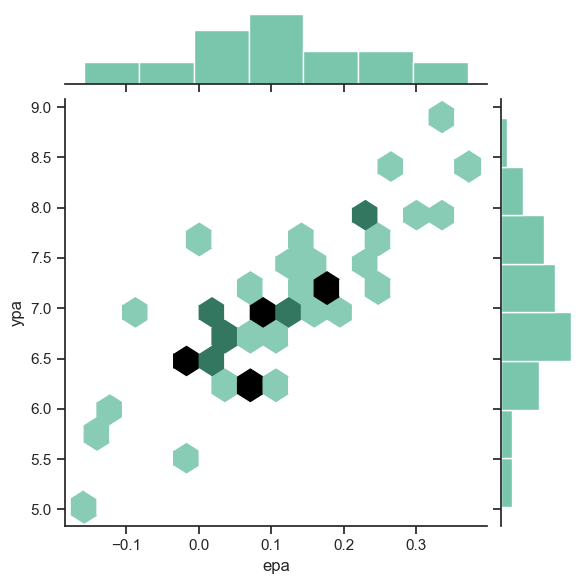

In [49]:
#joint plot for the relation between touchdowns and interceptions
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")


x = all['epa']
y = all['ypa']
joint_kws=dict(gridsize=15)
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391",joint_kws= joint_kws)

In [50]:
all

,passer_player_name,passing_yards,epa,pass_attempt,ypa
102,T.Tagovailoa,3548.0,0.330150,399.0,8.892231
87,S.Darnold,1143.0,0.258798,137.0,8.343066
12,B.Purdy,1943.0,0.370602,233.0,8.339056
80,P.Mahomes,5953.0,0.337131,748.0,7.958556
49,J.Garoppolo,2437.0,0.308329,307.0,7.938111
84,R.Tannehill,2536.0,0.220776,324.0,7.827160
52,J.Hurts,4280.0,0.223263,547.0,7.824497
2,A.Dalton,2871.0,0.144591,378.0,7.595238
58,J.Winston,858.0,-0.001615,113.0,7.592920
40,J.Allen,4900.0,0.228592,647.0,7.573416


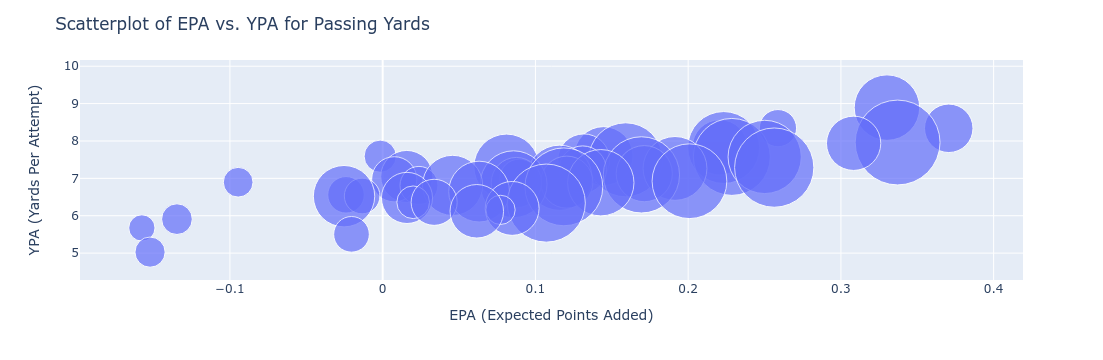

In [54]:
import plotly.express as px

fig = px.scatter(all, x="epa", y="ypa",
	         size="passing_yards", 
                 hover_name="passer_player_name", size_max=60)
fig.update_layout(
    title="Scatterplot of EPA vs. YPA for Passing Yards",
    xaxis_title="EPA (Expected Points Added)",
    yaxis_title="YPA (Yards Per Attempt)"
)


fig.show()